In [ ]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

nltk.download('stopwords')
nltk.download('punkt')


data = pd.read_csv("/content/drive/MyDrive/dataset.csv")

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(filtered_tokens)

data['Processed_Text'] = data['text'].apply(preprocess_text)


vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Processed_Text'])
y = data['text_type']


classifier = SVC(kernel='linear')
classifier.fit(X, y)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


SVC(kernel='linear')

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
predictions = classifier.predict(X)
accuracy = accuracy_score(y, predictions)
precision = precision_score(y, predictions, pos_label='spam')
recall = recall_score(y, predictions, pos_label='spam')
f1 = f1_score(y, predictions, pos_label='spam')
conf_matrix = confusion_matrix(y, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.98388047965402
Precision: 0.9731890091590342
Recall: 0.9722176010647147
F1 Score: 0.9727030625832224
Confusion Matrix:
[[14176   161]
 [  167  5844]]


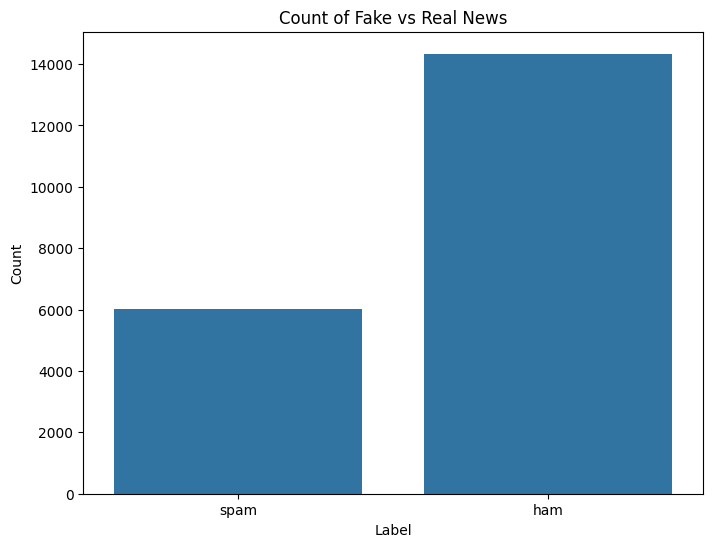

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='text_type', data=data)
plt.title('Count of Fake vs Real News')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

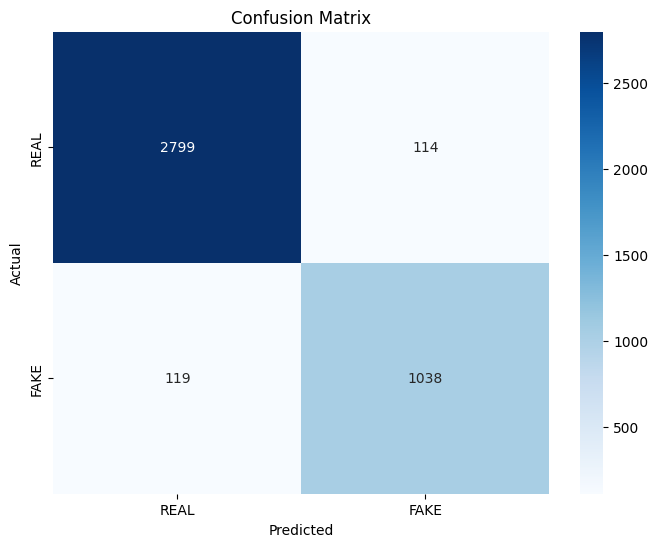

In [25]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['REAL', 'FAKE'], yticklabels=['REAL', 'FAKE'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
def predict_spam_ham(message):
    processed_message = preprocess_text(message)
    message_vectorized = vectorizer.transform([processed_message])
    prediction = classifier.predict(message_vectorized)
    return prediction[0]
message = input("Enter a message to test: ")
prediction = predict_spam_ham(message)

if prediction == 'spam':
    print("The message is classified as spam.")
else:
    print("The message is classified as ham.")

Enter a message to test: hii bro welcome back to our channel
The message is classified as ham.
